# Final Project: 2018 Match Analysis - First Robotics Compition

## Where is your data from?
#### [Dataset From Kaggle https://www.kaggle.com/samcfuchs/frc-2018](https://www.kaggle.com/samcfuchs/frc-2018)


## Event Details
[2018 FIRST Robotics Competition - FIRST POWER UP Game PREVIEW](https://www.youtube.com/watch?v=HZbdwYiCY74)

[2018 FRCGame Season Manual](https://firstfrc.blob.core.windows.net/frc2018/Manual/2018FRCGameSeasonManual.pdf)

[PNW District Auburn Event 2018](https://www.thebluealliance.com/event/2018waahs)

[PNW District Auburn Event Insights 2018](https://www.thebluealliance.com/event/2018waahs#event-insights)

[PNW District Auburn Mountainview Event 2018](https://www.thebluealliance.com/event/2018waamv)

[PNW District Auburn Mountainview Event Insights 2018](https://www.thebluealliance.com/event/2018waamv#event-insights)

[Team 2927: πRho Techs](https://www.thebluealliance.com/team/2927/2018)


## What were you looking to answer and predictions you wanted to make?
1. Points Analysis
    - How were points distributed?
2. Obsticle Analysis
    - What obsticles where used most often?
    - What obsticle(s) affected win/lose ratio the most?
3. Team Analysis
    - What alliances (group of 3 teams) won/lost most often?
    - What team won/lost most often?
    - What team won/lost least often?
4. Location Analysis
    - Does region or origin affect win/lose ratio?
    - Does playing location affect win/lose ratio?
5. Other Analysis


## A brief summary of your methodology for answering these questions
Using Clustering, Classification, and Regression analysis methods we plan to simplify and deduce the order and magnitude in which something affects the outcome of another.

Using Fitted and Embedded Methods to do analysis

√ 1- Apply supervised or un-supervised models to a dataset (or problem) you are interested in. Investigate variety of steps
to make the model better including:
  - Hyper-parameter tuning by Grid-search
  - Check if dataset is balanced or not -> change the threshold
  - Data preprocessing (scaling)
  - Dimensionality reduction (PCA) -> train the model based on X_reduced_train and Y_reduced_train
  - Eliminate unnecessary features -> Feature Engineering
  - Try other models and do the above all steps

√ 2- Read blogs about Feature Engineering and make your model performance better with variety of Feature Engineering options:
- https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
- https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

3- Build a Decision Tree (DT) classifier from Scratch (you can use Pandas or any other Python built-in functions) and provide DT visualization. For any categorical dataset, your function should return the optimal tree with the root and all appropriate leafs, max_depth of the tree and the visualized graph. You can follow the steps we explored in class but should work for any dataset for example if we pass Lens dataset. 

## Graphs and other visualizations that clearly explain your findings (ideally, conclusions)


## Metrics you tracked, the values for each, and how you interpret the results 

|Metrics          | Value               |
|-----------------|---------------------|
|accuracy         | 0.8888888888888888  |
|error            | 0.1111111111111111  |
|recall           | 0.8333333333333334  |
|precision        | 1.0                 |
|specificity      | 1.0                 |
|F1               | 0.9090909090909091  |

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import statsmodels.api as sm

from sklearn import preprocessing, metrics, preprocessing, svm
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('2018_MatchData.csv').set_index("Week")
data = Team2927 = data[data['Team'] == 2927].set_index(['Event', 'Match', 'Alliance'])
data = data.drop(['City','State','Country','Time','autoQuestRankingPoint','autoRun','autoSwitchAtZero','endgame','faceTheBossRankingPoint','Robot Number', 'adjustPoints', 'tba_gameData'], axis=1)

label_encoder = LabelEncoder()
for i in data.columns:
    data[i] = label_encoder.fit_transform(data[i]).astype('float64')

result = label_encoder.fit_transform(data['result']).astype('float64')
# result = data['result']
data = data.drop(columns=['Team'])
result

array([1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0.])

In [3]:
data

autoOwnershipPoints  autoPoints  autoRunPoints  \
Event Match Alliance                                                   
waahs qf4m1 red                       0.0         2.0            2.0   
      qf4m2 red                       2.0         5.0            2.0   
      qm1   red                       0.0         1.0            1.0   
      qm15  blue                      6.0         8.0            1.0   
      qm19  red                       0.0         1.0            1.0   
      qm27  red                       3.0         4.0            1.0   
      qm35  blue                      0.0         2.0            2.0   
      qm39  blue                      5.0         7.0            1.0   
      qm45  blue                      0.0         1.0            1.0   
      qm53  blue                      5.0        10.0            2.0   
      qm55  red                       0.0         2.0            2.0   
      qm64  blue                      5.0        10.0            2.0   
      qm68  red                       0.0         2.0            2.0   
      qm9   red                       0.0         0.0            0.0   
      sf2m1 blue                      1.0         3.0            2.0   
waamv qm10  red                       4.0         9.0            2.0   
      qm13  red                       4.0         6.0            1.0   
      qm19  blue                      8.0        13.0            2.0   
      qm30  red                       0.0         1.0            1.0   
      qm34  blue                      6.0        11.0            2.0   
      qm36  red                       0.0         2.0            2.0   
      qm45  blue                      0.0         1.0            1.0   
      qm49  red                       0.0         2.0            2.0   
      qm5   blue                      0.0         0.0            0.0   
      qm54  blue                      0.0         2.0            2.0   
      qm63  blue                      7.0        12.0            2.0   
      qm65  red                       5.0        10.0            2.0   

                      autoScaleOwnershipSec  autoSwitchOwnershipSec  \
Event Match Alliance                                                  
waahs qf4m1 red                         0.0                     0.0   
      qf4m2 red                         1.0                     1.0   
      qm1   red                         0.0                     0.0   
      qm15  blue                        0.0                     5.0   
      qm19  red                         0.0                     0.0   
      qm27  red                         0.0                     2.0   
      qm35  blue                        0.0                     0.0   
      qm39  blue                        0.0                     4.0   
      qm45  blue                        0.0                     0.0   
      qm53  blue                        0.0                     4.0   
      qm55  red                         0.0                     0.0   
      qm64  blue                        0.0                     4.0   
      qm68  red                         0.0                     0.0   
      qm9   red                         0.0                     0.0   
      sf2m1 blue                        0.0                     1.0   
waamv qm10  red                         0.0                     3.0   
      qm13  red                         0.0                     3.0   
      qm19  blue                        2.0                     4.0   
      qm30  red                         0.0                     0.0   
      qm34  blue                        0.0                     5.0   
      qm36  red                         0.0                     0.0   
      qm45  blue                        0.0                     0.0   
      qm49  red                         0.0                     0.0   
      qm5   blue                        0.0                     0.0   
      qm54  blue                        0.0                     0.0   
      qm63  blue

# 1. Filter Method:
As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

The correlation coefficient has values between -1 to 1

    — A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
    — A value closer to 1 implies stronger positive correlation
    — A value closer to -1 implies stronger negative correlation

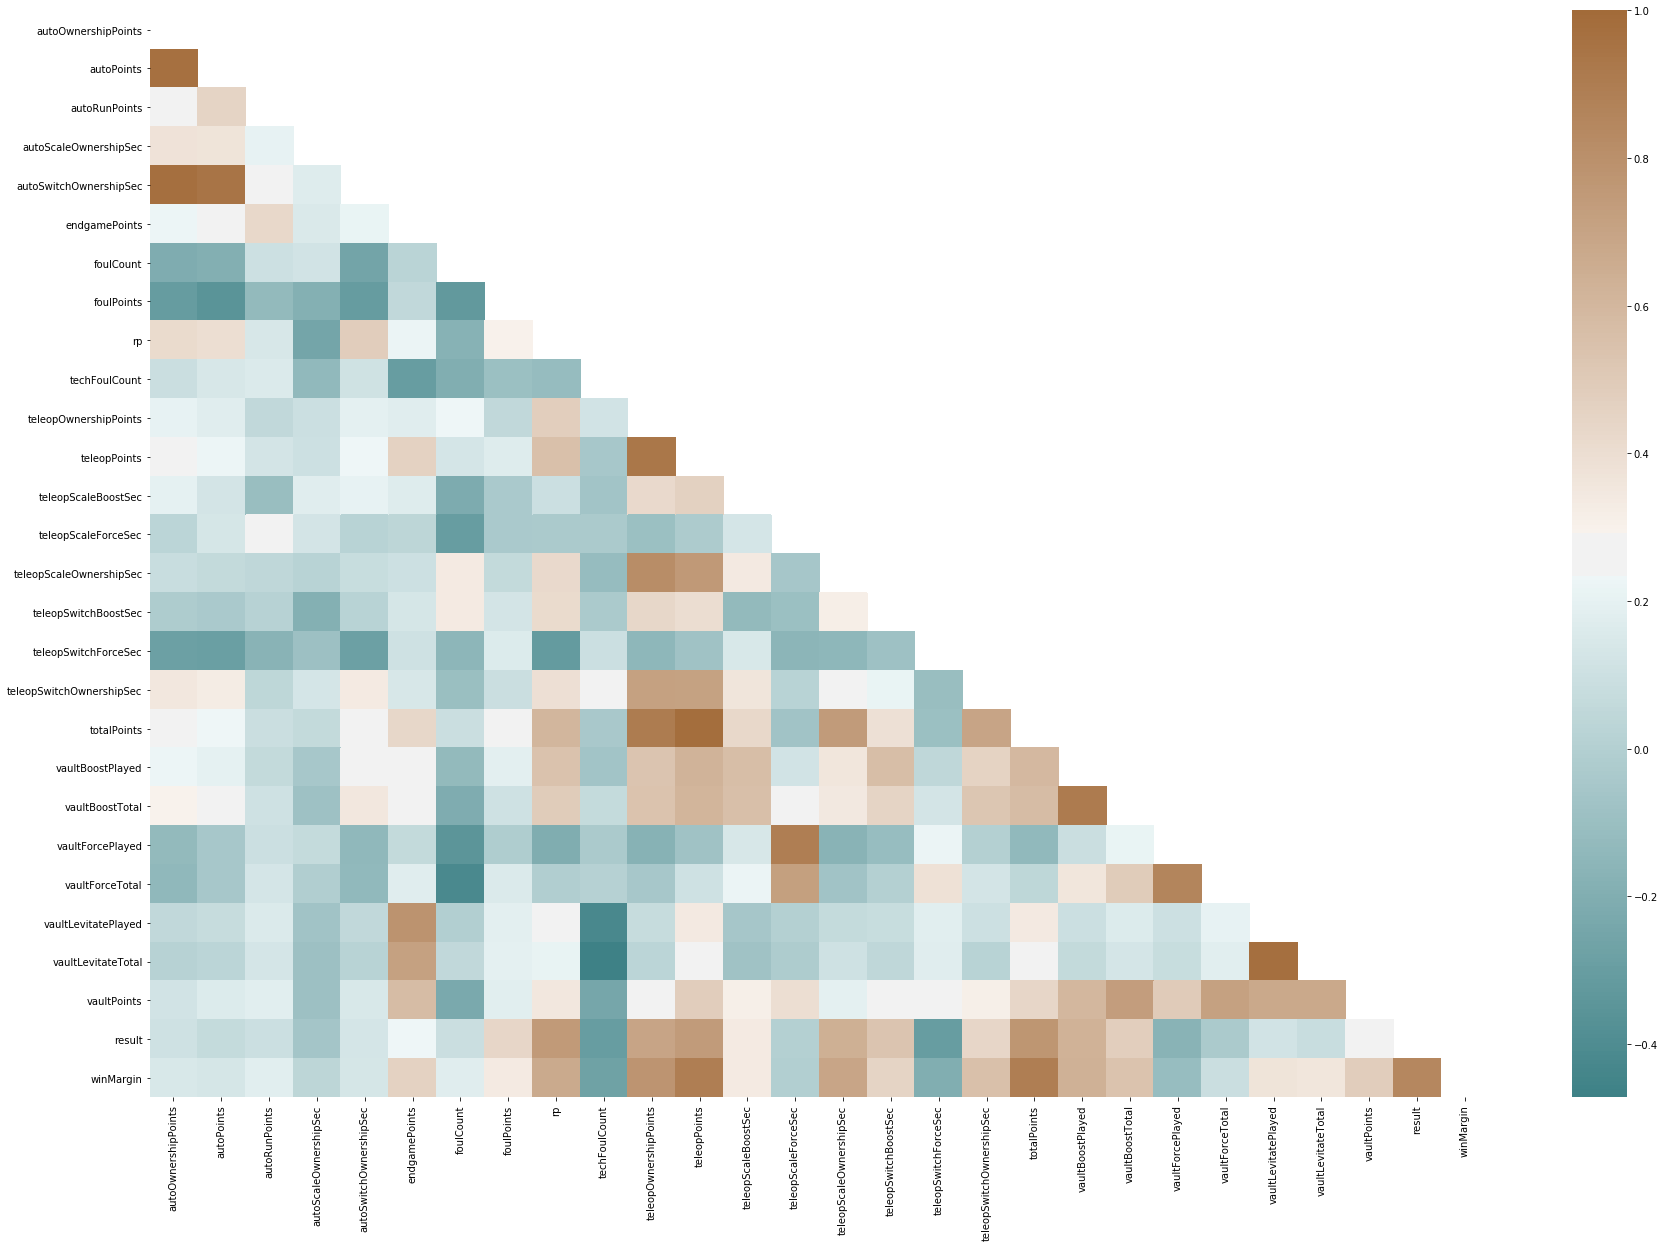

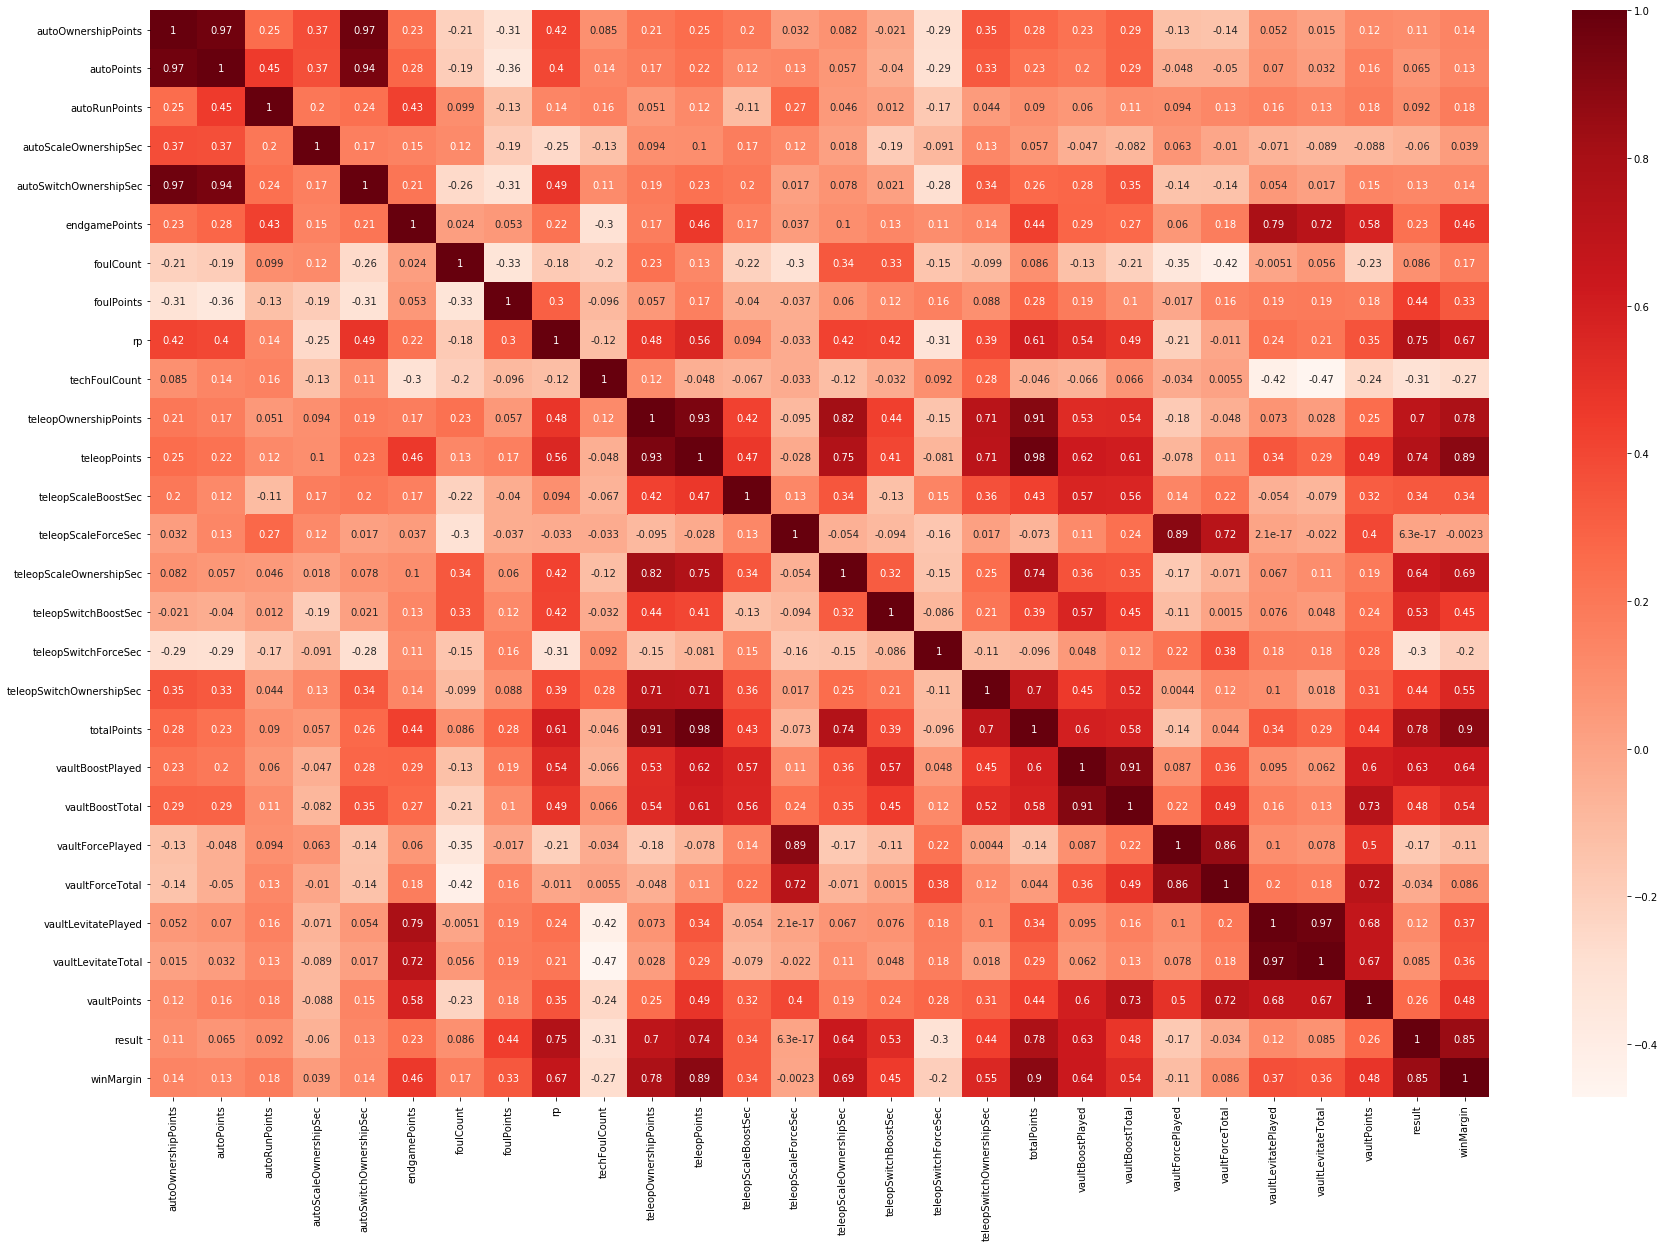

In [4]:
#Using Pearson Correlation
plt.figure(figsize=(30,20))
corr = data.corr()

# sns.heatmap(corr)

# Can be great to plot only a half matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(200, 40, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap)

plt.subplots(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

### Next, we compare the correlation between features and remove features that have a correlation higher than 0.9

In [5]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]
print(selected_columns)
data

Index(['autoOwnershipPoints', 'autoRunPoints', 'autoScaleOwnershipSec',
       'endgamePoints', 'foulCount', 'foulPoints', 'rp', 'techFoulCount',
       'teleopOwnershipPoints', 'teleopScaleBoostSec', 'teleopScaleForceSec',
       'teleopScaleOwnershipSec', 'teleopSwitchBoostSec',
       'teleopSwitchForceSec', 'teleopSwitchOwnershipSec', 'vaultBoostPlayed',
       'vaultForcePlayed', 'vaultForceTotal', 'vaultLevitatePlayed',
       'vaultPoints', 'result', 'winMargin'],
      dtype='object')


autoOwnershipPoints  autoRunPoints  \
Event Match Alliance                                       
waahs qf4m1 red                       0.0            2.0   
      qf4m2 red                       2.0            2.0   
      qm1   red                       0.0            1.0   
      qm15  blue                      6.0            1.0   
      qm19  red                       0.0            1.0   
      qm27  red                       3.0            1.0   
      qm35  blue                      0.0            2.0   
      qm39  blue                      5.0            1.0   
      qm45  blue                      0.0            1.0   
      qm53  blue                      5.0            2.0   
      qm55  red                       0.0            2.0   
      qm64  blue                      5.0            2.0   
      qm68  red                       0.0            2.0   
      qm9   red                       0.0            0.0   
      sf2m1 blue                      1.0            2.0   
waamv qm10  red                       4.0            2.0   
      qm13  red                       4.0            1.0   
      qm19  blue                      8.0            2.0   
      qm30  red                       0.0            1.0   
      qm34  blue                      6.0            2.0   
      qm36  red                       0.0            2.0   
      qm45  blue                      0.0            1.0   
      qm49  red                       0.0            2.0   
      qm5   blue                      0.0            0.0   
      qm54  blue                      0.0            2.0   
      qm63  blue                      7.0            2.0   
      qm65  red                       5.0            2.0   

                      autoScaleOwnershipSec  endgamePoints  foulCount  \
Event Match Alliance                                                    
waahs qf4m1 red                         0.0            5.0        6.0   
      qf4m2 red                         1.0            3.0        1.0   
      qm1   red                         0.0            0.0        4.0   
      qm15  blue                        0.0            4.0        1.0   
      qm19  red                         0.0            4.0        2.0   
      qm27  red                         0.0            3.0        1.0   
      qm35  blue                        0.0            4.0        0.0   
      qm39  blue                        0.0            5.0        0.0   
      qm45  blue                        0.0            3.0        0.0   
      qm53  blue                        0.0            5.0        1.0   
      qm55  red                         0.0            5.0        0.0   
      qm64  blue                        0.0            5.0        0.0   
      qm68  red                         0.0            4.0        5.0   
      qm9   red                         0.0            4.0        3.0   
      sf2m1 blue                        0.0            3.0        1.0   
waamv qm10  red                         0.0            3.0        0.0   
      qm13  red                         0.0            2.0        2.0   
      qm19  blue                        2.0            5.0        3.0   
      qm30  red                         0.0            3.0        0.0   
      qm34  blue                        0.0            5.0        0.0   
      qm36  red                         0.0            4.0        0.0   
      qm45  blue                        0.0            4.0        0.0   
      qm49  red                         0.0            4.0        7.0   
      qm5   blue                        0.0            0.0        0.0   
      qm54  blue                        0.0            4.0        1.0   
      qm63  blue                        0.0            4.0        1.0   
      qm65  red                         0.0            1.0        1.0   

                      foulPoints   rp  techFoulCount  teleopOwnershipPoints  \
Event Match Alliance                                                          
waahs

### Now, the dataset has only those columns with correlation less than 0.9

In [6]:
#Correlation with output variable
cor_target = abs(corr["result"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.9]
relevant_features

result    1.0
Name: result, dtype: float64

## As we can see, the features 
#### [rp, teleopOwnershipPoints, teleopPoints, teleopScaleBoostSec, teleopScaleOwnershipSec, totalPoints, and winMargin] 
### are highly correlated with the output variable result. 

Hence we will drop all other features apart from these. However **this is not the end of the process**. One of the assumptions of **linear regression** is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. So let us check the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix or from the code snippet below.

In [7]:
# 'teleopPoints', 'totalPoints',
simple_corr = data[['winMargin', 'teleopOwnershipPoints',
                    'teleopScaleOwnershipSec', 'rp',
                    'vaultBoostPlayed', 'teleopSwitchOwnershipSec',
                    'teleopScaleBoostSec']].corr()
simple_corr

,winMargin,teleopOwnershipPoints,teleopScaleOwnershipSec,rp,vaultBoostPlayed,teleopSwitchOwnershipSec,teleopScaleBoostSec
winMargin,1.000000,0.781256,0.691545,0.672015,0.636975,0.551526,0.338092
teleopOwnershipPoints,0.781256,1.000000,0.818376,0.480383,0.528347,0.714273,0.421830
teleopScaleOwnershipSec,0.691545,0.818376,1.000000,0.423970,0.360677,0.247544,0.339039
rp,0.672015,0.480383,0.423970,1.000000,0.543163,0.394472,0.094267
vaultBoostPlayed,0.636975,0.528347,0.360677,0.543163,1.000000,0.453608,0.568506
teleopSwitchOwnershipSec,0.551526,0.714273,0.247544,0.394472,0.453608,1.000000,0.362630
teleopScaleBoostSec,0.338092,0.421830,0.339039,0.094267,0.568506,0.362630,1.000000


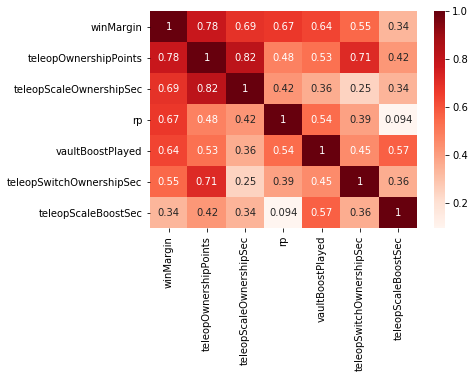

In [8]:
sns.heatmap(simple_corr, annot=True, cmap=plt.cm.Reds)

In [9]:
result = data.result

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.3)

In [11]:
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)
prediction

array([0., 0., 0., 1., 0., 0., 1., 0., 1.])

In [12]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

0.8888888888888888


In [13]:
# Instantiate logistic regression model
logreg = LogisticRegression()

# fit model
# Train the model with X_train and y_train
logreg.fit(x_train, y_train)

# Pass X_test into predict method -> call the result as y_pred
y_pred = logreg.predict(x_test)
print(y_pred)

confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

accuracy=(𝑇𝑃+𝑇𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁)
print("𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦:", accuracy)

error=(𝐹𝑃+𝐹𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁)
print("𝑒𝑟𝑟𝑜𝑟 =1−𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦:", error)

𝑟𝑒𝑐𝑎𝑙𝑙=𝑇𝑃/(𝑇𝑃+𝐹𝑁)
print("𝑟𝑒𝑐𝑎𝑙𝑙", 𝑟𝑒𝑐𝑎𝑙𝑙)

𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=𝑇𝑃/(𝑇𝑃+𝐹𝑃)
print("𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛", 𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛)

𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦=𝑇𝑁/(𝑇𝑁+𝐹𝑃)
print("𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦", 𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦)

F1 = 2*(𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 * 𝑟𝑒𝑐𝑎𝑙𝑙 )/(𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 + 𝑟𝑒𝑐𝑎𝑙𝑙)
print("f1", F1)

[0. 0. 0. 1. 0. 0. 1. 0. 1.]
[[6 1]
 [0 2]]
𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦: 0.8888888888888888
𝑒𝑟𝑟𝑜𝑟 =1−𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦: 0.1111111111111111
𝑟𝑒𝑐𝑎𝑙𝑙 1.0
𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 0.6666666666666666
𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦 0.8571428571428571
f1 0.8


# 3. Embedded Method
Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [14]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)
# coef

NameError: name 'x' is not defined

In [ ]:
# print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
ct = 0
cf = 0
for i in coef:
    if i != 0:
        ct += 1
    if i == 0:
        cf += 1
print("Lasso picked " + str(ct) + " variables and eliminated the other " +  str(cf) + " variables")

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.tree import export_graphviz
import pydotplus

# read in the tennis data, need the extra parameters since it's a txt file
data = pd.read_csv('2018_MatchData.csv').set_index("Week")
data = Team2927 = data[data['Team'] == 2927].set_index(['Event', 'Match', 'Alliance'])

# encode the data so we can use it with our decision tree,
# by converting categories into numbers
data_encoded = data.apply(preprocessing.LabelEncoder().fit_transform)
# print(data_encoded)

# create our decision tree classifier with entropy
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# one_hot_data = pd.get_dummies(data[['a', 'b', 'c', 'd']], drop_first=True)
# print(one_hot_data)

# provide our feature array and target array (1-item),
# and train the model using a decision tree
clf.fit(data_encoded[[
    'City', 'State', 'Country', 'Time', 'Team', 'Robot Number',
    'adjustPoints', 'autoOwnershipPoints', 'autoPoints',
    'autoQuestRankingPoint', 'autoRun', 'autoRunPoints',
    'autoScaleOwnershipSec', 'autoSwitchAtZero', 'autoSwitchOwnershipSec',
    'endgamePoints', 'endgame', 'faceTheBossRankingPoint', 'foulCount',
    'foulPoints', 'rp', 'tba_gameData', 'techFoulCount',
    'teleopOwnershipPoints', 'teleopPoints', 'teleopScaleBoostSec',
    'teleopScaleForceSec', 'teleopScaleOwnershipSec',
    'teleopSwitchBoostSec', 'teleopSwitchForceSec',
    'teleopSwitchOwnershipSec', 'totalPoints', 'vaultBoostPlayed',
    'vaultBoostTotal', 'vaultForcePlayed', 'vaultForceTotal',
    'vaultLevitatePlayed', 'vaultLevitateTotal', 'vaultPoints',
    'winMargin'
]], data_encoded['result'])

# export our decision tree into data that can be plotted
dot_data = export_graphviz(clf, out_file=None, feature_names=[
    'City', 'State', 'Country', 'Time', 'Team', 'Robot Number',
    'adjustPoints', 'autoOwnershipPoints', 'autoPoints',
    'autoQuestRankingPoint', 'autoRun', 'autoRunPoints',
    'autoScaleOwnershipSec', 'autoSwitchAtZero', 'autoSwitchOwnershipSec',
    'endgamePoints', 'endgame', 'faceTheBossRankingPoint', 'foulCount',
    'foulPoints', 'rp', 'tba_gameData', 'techFoulCount',
    'teleopOwnershipPoints', 'teleopPoints', 'teleopScaleBoostSec',
    'teleopScaleForceSec', 'teleopScaleOwnershipSec',
    'teleopSwitchBoostSec', 'teleopSwitchForceSec',
    'teleopSwitchOwnershipSec', 'totalPoints', 'vaultBoostPlayed',
    'vaultBoostTotal', 'vaultForcePlayed', 'vaultForceTotal',
    'vaultLevitatePlayed', 'vaultLevitateTotal', 'vaultPoints',
    'winMargin'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('obstical_tree.png')

![obstical_tree.png](obstical_tree.png)

# Conclusions

## Result
1. winMargin
2. teleopOwnershipPoints
3. teleopScaleOwnershipsec
4. rp
5. vaultboostplayed
6. teleopSwitchOwnershipSec
7. teleopScaleBoostSec


## Metrics you tracked, the values for each, and how you interpret the results 

|Metrics          | Value               |
|-----------------|---------------------|
|accuracy         | 0.8888888888888888  |
|error            | 0.1111111111111111  |
|recall           | 0.8333333333333334  |
|precision        | 1.0                 |
|specificity      | 1.0                 |
|F1               | 0.9090909090909091  |

/Users/lukazphelps/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/lukazphelps/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/lukazphelps/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


autoOwnershipPoints  autoRunPoints  \
Event Match Alliance                                       
waahs qf4m1 red                       0.0            2.0   
      qf4m2 red                       2.0            2.0   
      qm1   red                       0.0            1.0   
      qm15  blue                      6.0            1.0   
      qm19  red                       0.0            1.0   
      qm27  red                       3.0            1.0   
      qm35  blue                      0.0            2.0   
      qm39  blue                      5.0            1.0   
      qm45  blue                      0.0            1.0   
      qm53  blue                      5.0            2.0   
      qm55  red                       0.0            2.0   
      qm64  blue                      5.0            2.0   
      qm68  red                       0.0            2.0   
      qm9   red                       0.0            0.0   
      sf2m1 blue                      1.0            2.0   
waamv qm10  red                       4.0            2.0   
      qm13  red                       4.0            1.0   
      qm19  blue                      8.0            2.0   
      qm30  red                       0.0            1.0   
      qm34  blue                      6.0            2.0   
      qm36  red                       0.0            2.0   
      qm45  blue                      0.0            1.0   
      qm49  red                       0.0            2.0   
      qm5   blue                      0.0            0.0   
      qm54  blue                      0.0            2.0   
      qm63  blue                      7.0            2.0   
      qm65  red                       5.0            2.0   

                      autoScaleOwnershipSec  endgamePoints  foulCount  \
Event Match Alliance                                                    
waahs qf4m1 red                         0.0            5.0        6.0   
      qf4m2 red                         1.0            3.0        1.0   
      qm1   red                         0.0            0.0        4.0   
      qm15  blue                        0.0            4.0        1.0   
      qm19  red                         0.0            4.0        2.0   
      qm27  red                         0.0            3.0        1.0   
      qm35  blue                        0.0            4.0        0.0   
      qm39  blue                        0.0            5.0        0.0   
      qm45  blue                        0.0            3.0        0.0   
      qm53  blue                        0.0            5.0        1.0   
      qm55  red                         0.0            5.0        0.0   
      qm64  blue                        0.0            5.0        0.0   
      qm68  red                         0.0            4.0        5.0   
      qm9   red                         0.0            4.0        3.0   
      sf2m1 blue                        0.0            3.0        1.0   
waamv qm10  red                         0.0            3.0        0.0   
      qm13  red                         0.0            2.0        2.0   
      qm19  blue                        2.0            5.0        3.0   
      qm30  red                         0.0            3.0        0.0   
      qm34  blue                        0.0            5.0        0.0   
      qm36  red                         0.0            4.0        0.0   
      qm45  blue                        0.0            4.0        0.0   
      qm49  red                         0.0            4.0        7.0   
      qm5   blue                        0.0            0.0        0.0   
      qm54  blue                        0.0            4.0        1.0   
      qm63  blue                        0.0            4.0        1.0   
      qm65  red                         0.0            1.0        1.0   

                      foulPoints   rp  techFoulCount  teleopOwnershipPoints  \
Event Match Alliance                                                          
waahs

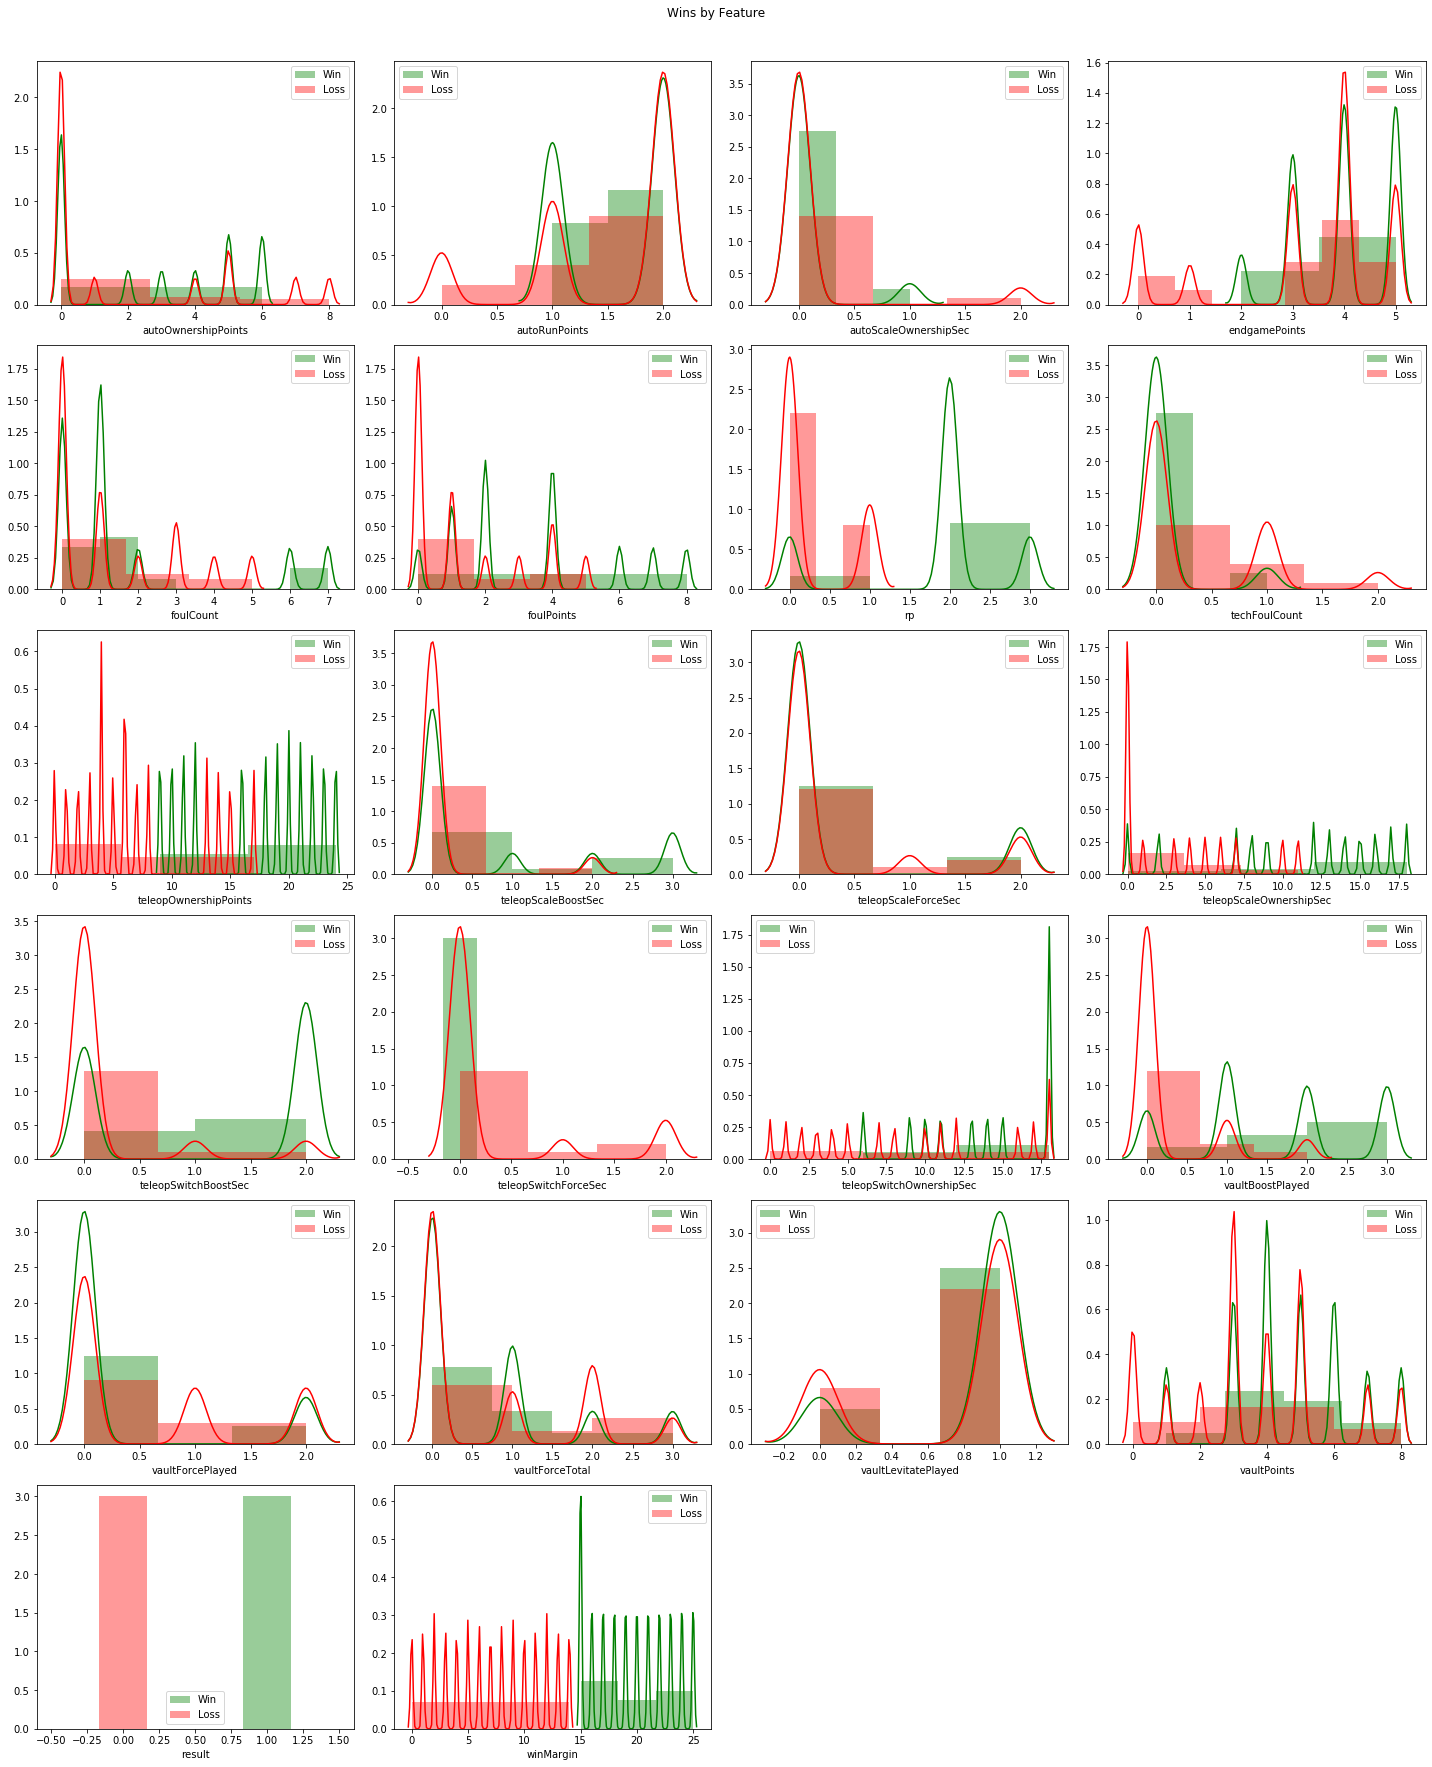

In [34]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1 )
    j += 1
    sns.distplot(data[i][data['result']==1], color='g', label = 'Win', kde_kws={'bw': 0.1})
    sns.distplot(data[i][data['result']==0], color='r', label = 'Loss',kde_kws={'bw': 0.1})
    plt.legend(loc='best')
fig.suptitle('Wins by Feature')
fig.tight_layout()
fig.subplots_adjust(top=0.95 )
plt.show()
# data